In this example, you will implement a perceptron and test in on linearly seperable and inseperable datasets.




(a) Implement a perceptron. 

<img src="https://miro.medium.com/max/1400/1*hm-Whb2f2dgObJuEoCuCAQ.png" width="500px" height="auto">


In [4]:
def unit_step(v):
  if v >= 0:
    return 1
  else:
    return 0

def perceptron(x, w, b):
  v = np.dot(w,x) + b
  y = unit_step(v)
  return y

(b) Can a perceptron implement the AND and OR logical function?
Plot the separator and $\vec{w}$ on one of this logical function in the google doc


<image src = 'https://i.stack.imgur.com/SRPDx.gif'>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

w: [2 1]
b: -3
y: [0 0 0 1]


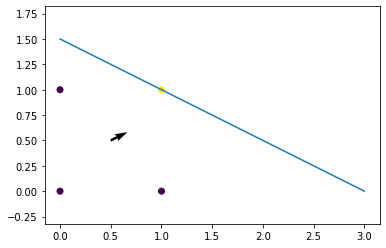

In [6]:
# AND
x = np.array([[0,0],[0,1],[1,0],[1,1]])
w = np.array([0,0])
d = np.array([0,0,0,1])
b = 0

y = np.array([0,0,0,0])
convergence = False
while not convergence:
  temp_w = w
  temp_b = b
  for i in range(x.shape[0]):
    y[i] = perceptron(x[i],w,b)
    w = w + (d[i]-y[i])*x[i]
    b = b + (d[i]-y[i])
  if (w == temp_w).all() and b == temp_b:
    convergence = True

print("w:",w)
print("b:",b)
print("y:",y)
plt.axis("equal")
plt.quiver(.5, .5, w[0], w[1])
plt.scatter(x[:,0], x[:,1], c=y)
plt.plot([0,-b/w[1]],[-b/w[0],0])
plt.show()

w: [1 1]
b: -1
y: [0 1 1 1]


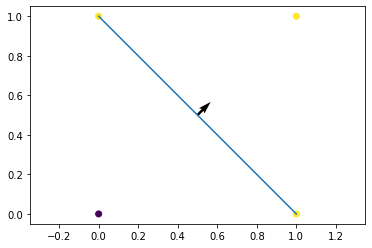

In [7]:
# OR
x = np.array([[0,0],[0,1],[1,0],[1,1]])
w = np.array([0,0])
d = np.array([0,1,1,1])
b = 0

y = np.array([0,0,0,0])
convergence = False
while not convergence:
  temp_w = w
  temp_b = b
  for i in range(x.shape[0]):
    y[i] = perceptron(x[i],w,b)
    w = w + (d[i]-y[i])*x[i]
    b = b + (d[i]-y[i])
  if (w == temp_w).all() and b == temp_b:
    convergence = True

print("w:",w)
print("b:",b)
print("y:",y)
plt.axis("equal")
plt.quiver(.5, .5, w[0], w[1])
plt.scatter(x[:,0], x[:,1], c=y)
plt.plot([0,-b/w[1]],[-b/w[0],0])
plt.show()

(c) Can a perceptron implement the XOR logical function?
Show that the separator keeps moving after 1000 iterations.

<img src="http://www.vlsiinterviewquestions.org/wp-content/uploads/2012/04/xor.jpg">

In [14]:
# XOR
x = np.array([[0,0],[0,1],[1,0],[1,1]])
w = np.array([0,0])
d = np.array([0,1,1,0])
b = 0

y = np.array([0,0,0,0])
convergence = False
for n in range(1001):
  temp_w = w
  temp_b = b
  for i in range(x.shape[0]):
    y[i] = perceptron(x[i],w,b)
    w = w + (d[i]-y[i])*x[i]
    b = b + (d[i]-y[i])
    if n == 999:
      print("b at run 999:",b)
    if n == 1000:
      print("b at run 1000:",b)

b at run 999: -1
b at run 999: 0
b at run 999: 1
b at run 999: 0
b at run 1000: -1
b at run 1000: 0
b at run 1000: 1
b at run 1000: 0


XOR cannot converge to the correct solution using a single perceptron since the data for XOR is not linearly seperable.

d) What could be done to have the perceptron at least converge, even if not to a solution (i.e., so that it does not keep rotating around).

Instead of attempting to reach convergence we can run for until we reach some max number of iterations. In order to classify XOR correctly however, we can combine multiple perceptrons to get the correct classification since: $XOR(A,B) = OR(AND(NOT(A),B),AND(A,NOT(B)))$.